In [245]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

In [246]:
call_df = pd.read_csv('training_data1.csv')
# call_df=call_df.iloc[:,1:]
print(len(call_df))
call_df.head()

199972


,Unnamed: 0,call_id,outlet_id,is_stock_taken,transactionid,user_id,fordate,order_id,order_placed
0,0,1000006,146762,False,2110202308141245227853,2110,2023-08-14,0,no
1,1,1000010,5432,True,0068202308141245595634,68,2023-08-14,0,no
2,2,1000012,145279,False,2036202308141245582475,2036,2023-08-14,0,no
3,3,1000013,113532,False,2184202308141246321842,2184,2023-08-14,466094,yes
4,4,1000017,124292,False,0933202308141238423944,933,2023-08-14,0,no


In [247]:
call_df.outlet_id.value_counts()

outlet_id
146495    85
137709    84
89099     82
137897    81
137710    81
          ..
135431    11
89175     11
122773    11
101385    11
142396    11
Name: count, Length: 8596, dtype: int64

In [248]:
# cd1 = call_df[call_df['138078']==0]
# print(len(cd1))
# cd1.head()

In [249]:
call_df.fordate.min()

'2023-07-10'

In [250]:
call_df.columns

Index(['Unnamed: 0', 'call_id', 'outlet_id', 'is_stock_taken', 'transactionid',
       'user_id', 'fordate', 'order_id', 'order_placed'],
      dtype='object')

In [251]:
call_df=call_df.drop(['Unnamed: 0', 'call_id', 'is_stock_taken', 'transactionid','user_id'],axis=1)

In [252]:
outlet_data = pd.read_csv("outlet_data.csv")
outlet_data=outlet_data.iloc[:,1:]
outlet_data.head()

,outlet_id,balance,total_quantity,total_price,...,city,pin,state,outletcategory
0,713,36453,8,1403,...,Kalyan,421306.0,MAHARASHTRA,Kirana / Grocery / General Store
1,1542,120363,6,1081,...,Bhiwandi,421302.0,MAHARASHTRA,Kirana / Grocery / General Store
2,1697,0,6,1148,...,NaN,NaN,NaN,NaN
3,2298,14900,22,3165,...,Palghar,401404.0,MAHARASHTRA,Kirana / Grocery / General Store
4,2299,21852,15,2751,...,Palghar,NaN,MAHARASHTRA,Kirana / Grocery / General Store


In [253]:
outlet_data.city.value_counts()

city
Hubballi        558
Bangalore       475
Belagavi        390
Navi Mumbai     307
SANGLI          180
               ... 
Lohara            1
SHRINGARTALI      1
Gondawale         1
Siddapur          1
Sankeshwar        1
Name: count, Length: 123, dtype: int64

In [254]:
outlet_data['outletcategory']=outlet_data['outletcategory'].fillna('Kirana / Grocery / General Store')

In [255]:
outlet_data.columns

Index(['outlet_id', 'balance', 'total_quantity', 'total_price',
       'order_frequency_avg', 'days_late_delivery_avg',
       'days_until_delivery_avg', 'ordering_pattern_mode', 'high_qty_high_amt',
       'high_qty_less_amt', 'less_qty_high_amt', 'less_qty_less_amt',
       'beat_name', 'city', 'pin', 'state', 'outletcategory'],
      dtype='object')

In [256]:
outlet_data = outlet_data.drop(['beat_name', 'city', 'pin', 'state'],axis=1)

In [257]:
df1 = pd.merge(call_df,outlet_data,how='inner',on='outlet_id')
print(len(df1))
df1.head()

199972


,outlet_id,fordate,order_id,order_placed,...,high_qty_less_amt,less_qty_high_amt,less_qty_less_amt,outletcategory
0,146762,2023-08-14,0,no,...,1,0,12,Kirana / Grocery / General Store
1,146762,2023-08-21,0,no,...,1,0,12,Kirana / Grocery / General Store
2,146762,2023-08-28,0,no,...,1,0,12,Kirana / Grocery / General Store
3,146762,2023-09-04,496634,yes,...,1,0,12,Kirana / Grocery / General Store
4,146762,2023-09-25,528379,yes,...,1,0,12,Kirana / Grocery / General Store


In [258]:
df1.head()

,outlet_id,fordate,order_id,order_placed,...,high_qty_less_amt,less_qty_high_amt,less_qty_less_amt,outletcategory
0,146762,2023-08-14,0,no,...,1,0,12,Kirana / Grocery / General Store
1,146762,2023-08-21,0,no,...,1,0,12,Kirana / Grocery / General Store
2,146762,2023-08-28,0,no,...,1,0,12,Kirana / Grocery / General Store
3,146762,2023-09-04,496634,yes,...,1,0,12,Kirana / Grocery / General Store
4,146762,2023-09-25,528379,yes,...,1,0,12,Kirana / Grocery / General Store


In [259]:
df2 = df1.copy()

In [260]:
# df2.set_index('fordate', inplace=True)
 
# df2.sort_values(by=['outlet_id', df2.index.name], inplace=True)
# rolling_counts = df2.groupby('outlet_id').rolling(window='15D').count()
 
# # Remove the 'outlet_id' level from the index to allow for easier merging
# rolling_counts = rolling_counts.reset_index()
 
# # Rename the count column to '15_days_orders_count' and adjust any specific column if necessary
# rolling_counts.rename(columns={'order_count': '15_days_orders_count'}, inplace=True)
 
# # Merge the rolling counts with the original DataFrame
# # First, reset the index of the main DataFrame if you haven't already
# df2.reset_index(inplace=True)
# merged_df2 = pd.merge(df2, rolling_counts, on=['outlet_id', 'fordate'], how='left')
# merged_df2

In [261]:
outlet_frequency = df1['outlet_id'].value_counts(normalize=True)
df1['outlet_frequency'] = df1['outlet_id'].map(outlet_frequency)

In [262]:
df1['fordate'] = pd.to_datetime(df1['fordate'])
df1['days_since_recent_order'] = df1.groupby('outlet_id')['fordate'].transform(lambda x: (pd.Timestamp.now() - x.max()).days)

In [263]:
import pandas as pd

df1['fordate'] = pd.to_datetime(df1['fordate'])

def categorize_month(day):
    if day.day <= 10:
        return 'start_of_month'
    elif day.day <= 20:
        return 'mid_of_month'
    else:
        return 'end_of_month'

df1['month_category'] = df1['fordate'].apply(categorize_month)


In [264]:
df1['fordate'] = pd.to_datetime(df1['fordate'])
df1['call_frequency'] = df1.groupby('outlet_id')['fordate'].diff().dt.days.fillna(0)
df1['day_of_week'] = df1['fordate'].dt.day_of_week
df1['month_of_year'] = df1['fordate'].dt.month
# capturing seasonal trends that might affect the data
df1['quarter'] = df1['fordate'].dt.quarter
# useful for capturing weekly seasonal patterns 
df1['week_of_year'] = df1['fordate'].dt.isocalendar().week
# # some businesses might see increased activity at the beginning or end of the month due to payday or monthly reporting periods
# df1['is_month_start'] = df1['fordate'].dt.is_month_start
# df1['is_month_end'] = df1['fordate'].dt.is_month_end
# df1['is_month_start'] = df1['is_month_start'].astype(int)
# df1['is_month_end'] = df1['is_month_end'].astype(int)



df1.head()

,outlet_id,fordate,order_id,order_placed,...,day_of_week,month_of_year,quarter,week_of_year
0,146762,2023-08-14,0,no,...,0,8,3,33
1,146762,2023-08-21,0,no,...,0,8,3,34
2,146762,2023-08-28,0,no,...,0,8,3,35
3,146762,2023-09-04,496634,yes,...,0,9,3,36
4,146762,2023-09-25,528379,yes,...,0,9,3,39


In [265]:
df1.columns

Index(['outlet_id', 'fordate', 'order_id', 'order_placed', 'balance',
       'total_quantity', 'total_price', 'order_frequency_avg',
       'days_late_delivery_avg', 'days_until_delivery_avg',
       'ordering_pattern_mode', 'high_qty_high_amt', 'high_qty_less_amt',
       'less_qty_high_amt', 'less_qty_less_amt', 'outletcategory',
       'outlet_frequency', 'days_since_recent_order', 'month_category',
       'call_frequency', 'day_of_week', 'month_of_year', 'quarter',
       'week_of_year'],
      dtype='object')

In [266]:
df1.outlet_frequency.value_counts()


outlet_frequency
0.000125    23175
0.000120    21120
0.000115    18193
0.000130    17264
0.000110    15422
            ...  
0.000390       78
0.000360       72
0.000355       71
0.000335       67
0.000325       65
Name: count, Length: 70, dtype: int64

In [267]:
# ot2.to_csv("false_stock_order_ids.csv")
ot3 =outlet_data[outlet_data['outlet_id']==158685]
ot3

,outlet_id,balance,total_quantity,total_price,...,high_qty_less_amt,less_qty_high_amt,less_qty_less_amt,outletcategory


In [268]:
final_df = df1

In [269]:
ordering_pattern_mapping = {'Frequent': 3,'Regular': 2, 'Occasional': 1, 'Infrequent': 0}
final_df["ordering_pattern_mode"]= final_df['ordering_pattern_mode'].map(ordering_pattern_mapping)

order_placed_mapping ={'yes':1,'no':0}
final_df['order_placed'] =final_df['order_placed'].map(order_placed_mapping)

month_cat_mapping ={'start_of_month':0,'mid_of_month':1,'end_of_month':2}
final_df['month_category'] =final_df['month_category'].map(month_cat_mapping)

outlet_cat_mapping = {'Self Service Store / Stand Alone / Super Market': 0,'HoReCa': 1,'Pan / Cigarette Shop / Tea Point': 2, 
                      'Bakery / Sweets & Snacks Shop / Juice Center': 3, 'Kirana / Grocery / General Store': 4,'Chemist / Medical Store':5,
                      'Wholesaler':6,'Dairy / Ice Cream Parlour':7,'Oil Trader':8,'Liquor Shop':9,'Hospital':10}
final_df["outletcategory"]= final_df['outletcategory'].map(outlet_cat_mapping)

final_df.head()

,outlet_id,fordate,order_id,order_placed,...,day_of_week,month_of_year,quarter,week_of_year
0,146762,2023-08-14,0,0,...,0,8,3,33
1,146762,2023-08-21,0,0,...,0,8,3,34
2,146762,2023-08-28,0,0,...,0,8,3,35
3,146762,2023-09-04,496634,1,...,0,9,3,36
4,146762,2023-09-25,528379,1,...,0,9,3,39


In [270]:
# plt.figure(figsize=(10,5))
# sns.heatmap(final_df.corr(),annot=True,cmap='RdYlBu_r')

In [271]:
# sns.pairplot(df)
final_df.columns

Index(['outlet_id', 'fordate', 'order_id', 'order_placed', 'balance',
       'total_quantity', 'total_price', 'order_frequency_avg',
       'days_late_delivery_avg', 'days_until_delivery_avg',
       'ordering_pattern_mode', 'high_qty_high_amt', 'high_qty_less_amt',
       'less_qty_high_amt', 'less_qty_less_amt', 'outletcategory',
       'outlet_frequency', 'days_since_recent_order', 'month_category',
       'call_frequency', 'day_of_week', 'month_of_year', 'quarter',
       'week_of_year'],
      dtype='object')

In [272]:
X = final_df.drop(['order_placed','fordate','days_late_delivery_avg','quarter','week_of_year','order_id','outlet_frequency','outlet_id',
                   'outletcategory','days_until_delivery_avg'], axis=1)
#'outletcategory','day_of_week','total_quantity','month_category','total_price'
# 'order_placed','fordate','days_late_delivery_avg','quarter','week_of_year','order_id','outlet_frequency','outlet_id',
y = final_df['order_placed']
# days_until_delivery_avg  dropped based on extra tree classifier feature importance

In [273]:
# X['outlet_id'] = X['outlet_id'].astype('category')
# from category_encoders import TargetEncoder
# encoder = TargetEncoder(cols=['outlet_id'],)
# encoder.fit_transform(X, y)

In [274]:
df1[df1['order_id']==453737]

,outlet_id,fordate,order_id,order_placed,...,day_of_week,month_of_year,quarter,week_of_year


In [275]:
# xdf =df1[df1['outlet_id']==151287]
# print(len(xdf))
# print(len(xdf[xdf['order_placed']==1]))
# xdf

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [277]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [278]:
from collections import Counter
counter = Counter(y_train)
print(counter)

Counter({1: 105561, 0: 54416})


In [279]:
# # oversampling using SMOTE
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X_train, y_train = oversample.fit_resample(X_train, y_train)
# counter = Counter(y_train)
# print(counter)

#### Logistic Regression

In [280]:
from sklearn.linear_model  import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model = LogisticRegression()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6615826978372297


#### SVM

In [281]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
# #input  - kernel="rbf", gamma=0.5, C=1.0
# svm = SVC()
# svm.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print(f'F1 Score: {f1}')
# print('Classification Report:')
# print(report)
# print('Confusion Matrix:')
# print(conf_matrix)

#### Random forest classifier

In [282]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# model.fit(X_train, y_train)
# accuracy = model.score(X_test, y_test)
# print("Accuracy:", accuracy)
# Accuracy: 0.6252477011903913
# by dropping X = final_df.drop(['outlet_id','total_quantity', 'total_price','order_placed','fordate','days_late_delivery_avg','quarter','week_of_year','order_id','is_month_start', 'is_month_end'], axis=1)
# y = final_df['order_placed']

#### XGBoost classifier

In [283]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score

model = XGBClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test,y_pred)
print('\naccuracy_score on test dataset : ', accuracy_test)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'F1 Score: {f1}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)


accuracy_score on test dataset :  0.6923365420677585
F1 Score: 0.7930854731036339
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.30      0.40     13530
           1       0.71      0.89      0.79     26465

    accuracy                           0.69     39995
   macro avg       0.65      0.60      0.60     39995
weighted avg       0.67      0.69      0.66     39995

Confusion Matrix:
[[ 4108  9422]
 [ 2883 23582]]


#### Extra tree classifier

In [284]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)

extra_tree_forest.fit(X, y)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_],axis = 0)
accuracy = extra_tree_forest.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.4635829478684836


Feature: balance, Score: 0.06004
Feature: total_quantity, Score: 0.06438
Feature: total_price, Score: 0.07841
Feature: order_frequency_avg, Score: 0.05901
Feature: ordering_pattern_mode, Score: 0.00869
Feature: high_qty_high_amt, Score: 0.04706
Feature: high_qty_less_amt, Score: 0.03227
Feature: less_qty_high_amt, Score: 0.03428
Feature: less_qty_less_amt, Score: 0.04034
Feature: days_since_recent_order, Score: 0.05147
Feature: month_category, Score: 0.10131
Feature: call_frequency, Score: 0.14708
Feature: day_of_week, Score: 0.06851
Feature: month_of_year, Score: 0.20715


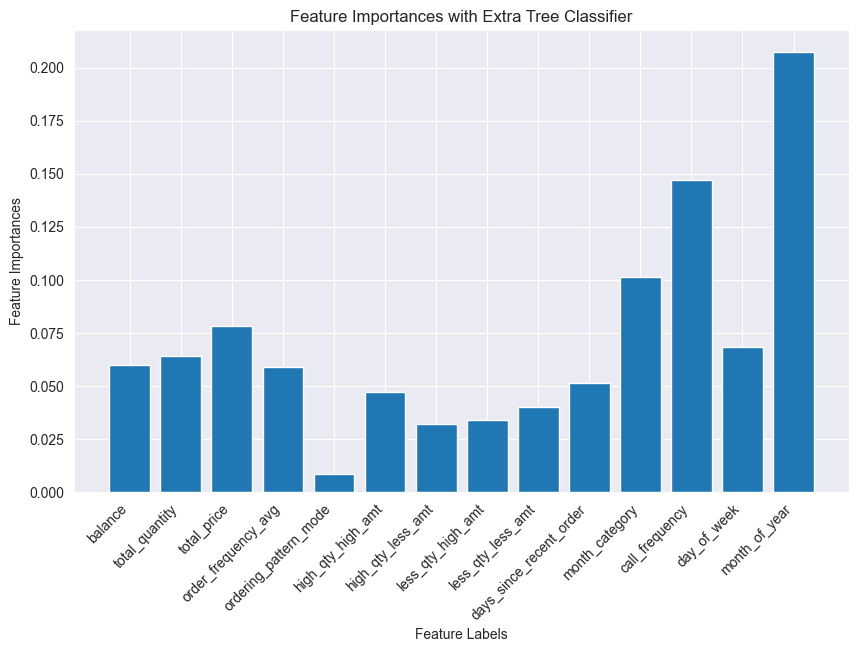

In [285]:
for i, v in enumerate(feature_importance):
    print('Feature: %s, Score: %.5f' % (X.columns[i], v))
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Feature Importances with Extra Tree Classifier')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Prediction

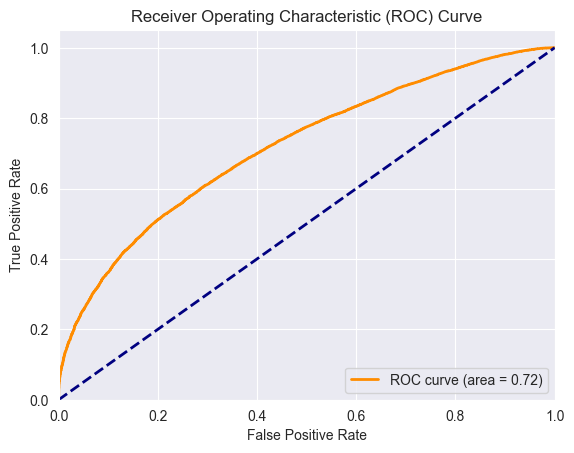

In [286]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [302]:
# # Get feature coefficients
# importance = model.coef_[0]

# for i, v in enumerate(importance):
#     print('Feature: %s, Score: %.5f' % (X.columns[i], v))

# plt.figure(figsize=(10, 6))
# plt.bar(X.columns, importance)
# plt.xlabel('Feature')
# plt.ylabel('Coefficient Magnitude')
# plt.title('Feature Coefficients in Logistic Regression')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# plt.show()

In [289]:
pred = model.predict_proba(X_test)
pred

array([[0.35948908, 0.6405109 ],
       [0.4359333 , 0.5640667 ],
       [0.35554945, 0.64445055],
       ...,
       [0.26868904, 0.73131096],
       [0.3617233 , 0.6382767 ],
       [0.57972157, 0.42027843]], dtype=float32)

In [290]:
# Predict probabilities on the validation set for both classes
y_probabilities = model.predict_proba(X_test)

# Extract probabilities for positive and negative outcomes
positive_probabilities = y_probabilities[:, 1]  # Probabilities of belonging to class 1 (positive outcome)
negative_probabilities = y_probabilities[:, 0]  # Probabilities of belonging to class 0 (negative outcome)

# Combine actual outcomes and predicted probabilities into a DataFrame
predicted_data = pd.DataFrame({'y': y_test, 'p_positive': positive_probabilities, 'p_negative': negative_probabilities})

# Write the predicted data to a CSV file
predicted_data.to_csv('predicted_data.csv', index=False)

print("Predicted data saved to predicted_data.csv")

Predicted data saved to predicted_data.csv


### Decile method

#### method 1
ref . https://www.analyticsvidhya.com/blog/2021/09/how-to-evaluate-the-business-value-of-ml-model/

In [291]:
max_prob = round(pd.DataFrame(np.amax(pred, axis=1), columns = ['prob_glm']),2)
max_prob.head()

,prob_glm
0,0.64
1,0.56
2,0.64
3,0.59
4,0.64


In [292]:
max_prob['Decile_rank_glm'] = pd.cut(max_prob['prob_glm'], 10, labels = np.arange(10,0, -1))
max_prob.head()

,prob_glm,Decile_rank_glm
0,0.64,8
1,0.56,9
2,0.64,8
3,0.59,9
4,0.64,8


In [293]:
# import kds
# kds.metrics.plot_cumulative_gain(y_test.to_numpy(), pred[:,1])

#### method 2
ref . https://pypi.org/project/kds/

In [294]:
from sklearn.model_selection import train_test_split
from sklearn import tree


# clf = tree.DecisionTreeClassifier(max_depth=1,random_state=3)
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)

import kds
kds.metrics.decile_table(y_test, y_prob[:,1])

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,...,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.772,0.954,0.818,...,15.114,5.292,7.117,1.241
1,2,0.730,0.772,0.750,...,30.225,12.712,11.014,1.186
2,3,0.703,0.730,0.716,...,45.339,20.776,13.942,1.157
3,4,0.679,0.703,0.690,...,60.450,29.490,15.883,1.134
4,5,0.656,0.679,0.667,...,75.564,38.780,16.958,1.115
5,6,0.634,0.656,0.645,...,90.674,49.010,16.609,1.094
6,7,0.611,0.634,0.622,...,100.000,60.540,14.298,1.069
7,8,0.587,0.611,0.599,...,100.000,72.912,10.712,1.045
8,9,0.555,0.587,0.572,...,100.000,85.602,6.648,1.025
9,10,0.086,0.555,0.527,...,100.000,100.000,0.000,1.000


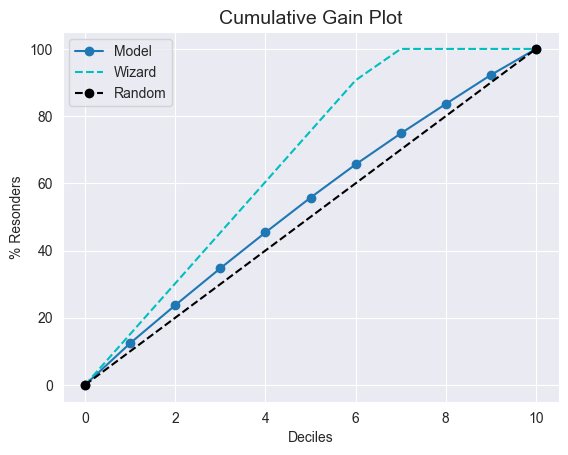

In [295]:
kds.metrics.plot_cumulative_gain(y_test, y_prob[:,1])

#### method 3
ref . https://www.listendata.com/2019/07/KS-Statistics-Python.html

In [296]:
prob_df = pd.read_csv('predicted_data.csv')
prob_df.head()

,y,p_positive,p_negative
0,1,0.640511,0.359489
1,1,0.564067,0.435933
2,1,0.644451,0.355549
3,1,0.588263,0.411737
4,0,0.364353,0.635647


In [297]:
prob_df['prob'] = prob_df.apply(lambda row: row['p_positive'] if row['y'] == 1 else row['p_negative'], axis=1)
prob_df = prob_df[['y', 'prob']]

prob_df.head()

,y,prob
0,1,0.640511
1,1,0.564067
2,1,0.644451
3,1,0.588263
4,0,0.635647


In [298]:
prob_df[prob_df['y']==1].sort_values(by='prob')

,y,prob
6400,1,0.123554
38022,1,0.123554
34641,1,0.123890
38492,1,0.125056
37841,1,0.128792
...,...,...
20540,1,0.999540
28424,1,0.999558
24083,1,0.999610
33516,1,0.999629


In [299]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [300]:
mydf = ks(data=prob_df,target="y", prob="prob")

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.892244  0.999651    3968         32     14.99%         0.24%   
2       0.811078  0.892235    3891        108     14.70%         0.80%   
3       0.738929  0.811068    3785        215     14.30%         1.59%   
4       0.671015  0.738922    3565        434     13.47%         3.21%   
5       0.607904  0.670976    3275        724     12.37%         5.35%   
6       0.550223  0.607867    2941       1059     11.11%         7.83%   
7       0.495710  0.550191    2297       1702      8.68%        12.58%   
8       0.433298  0.495707    1588       2412      6.00%        17.83%   
9       0.336999  0.433289     921       3078      3.48%        22.75%   
10      0.011042  0.336951     234       3766      0.88%        27.83%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             14.99

In [301]:
mydf.head()

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.892244,0.999651,3968,32,14.99%,0.24%,14.99%,0.24%,14.8
2,0.811078,0.892235,3891,108,14.70%,0.80%,29.70%,1.03%,28.7
3,0.738929,0.811068,3785,215,14.30%,1.59%,44.00%,2.62%,41.4
4,0.671015,0.738922,3565,434,13.47%,3.21%,57.47%,5.83%,51.6
5,0.607904,0.670976,3275,724,12.37%,5.35%,69.84%,11.18%,58.7
